# Predicting Customer Churn

### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
df=pd.read_csv('Telco customer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### Cleaning and analysing data

In [4]:
df[df.isnull()==True].count()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

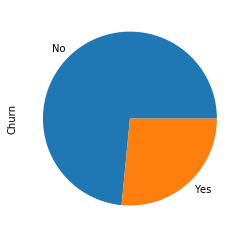

In [5]:
df['Churn'].value_counts(normalize=True).plot(kind='pie')

In [6]:
df.drop(['customerID'],axis=1,inplace=True)

In [7]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [8]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [9]:
df['SeniorCitizen'].replace(0,'False',inplace=True)
df['SeniorCitizen'].replace(1,'True',inplace=True)
df['SeniorCitizen'].value_counts()


False    5901
True     1142
Name: SeniorCitizen, dtype: int64

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'],errors='coerce')
df=df.dropna()
df.shape

(7032, 20)

### Model Prepration

In [11]:
data=pd.get_dummies(df,drop_first=True)

In [12]:
y = data["Churn_Yes"].values
X = data.drop(labels = ["Churn_Yes"],axis = 1)
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Accuracy Score

In [14]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8116560056858564


### Getting factors influencing results

In [15]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

InternetService_Fiber optic              0.617080
PaperlessBilling_Yes                     0.344990
MultipleLines_No phone service           0.263642
SeniorCitizen_True                       0.225864
PaymentMethod_Electronic check           0.212008
MultipleLines_Yes                        0.187112
StreamingTV_Yes                          0.173204
StreamingMovies_Yes                      0.129639
gender_Male                              0.050571
Partner_Yes                              0.031524
MonthlyCharges                           0.005587
TotalCharges                             0.000283
tenure                                  -0.060201
DeviceProtection_Yes                    -0.077384
PaymentMethod_Mailed check              -0.078767
OnlineSecurity_No internet service      -0.100663
InternetService_No                      -0.100663
DeviceProtection_No internet service    -0.100663
TechSupport_No internet service         -0.100663
StreamingTV_No internet service         -0.100663
